# ЛР 1 — Вводная

*Зубарева Марина, РИМ-181226, 7 вариант*

In [1]:
from skimage.io import imread, imshow, imsave

In [2]:
MODIFY_IMAGE_PATH = 'temporary-image.png'

import os

def show_img(img):
    imsave(MODIFY_IMAGE_PATH, img)
    print(imshow(MODIFY_IMAGE_PATH))
    os.remove(MODIFY_IMAGE_PATH)
    
def save_img(img, filename):
    imsave(filename, img)

In [3]:
orginal_image_path = 'hosiko.jpg'

img = imread(orginal_image_path)
sizes = img.shape

In [4]:
new_color = [190, 12, 150]
size = 30
img[sizes[0]//2-size:sizes[0]//2+size, sizes[1]//2-size:sizes[1]//2+size] = new_color

AxesImage(31.9852,27.8;389.215x245.585)


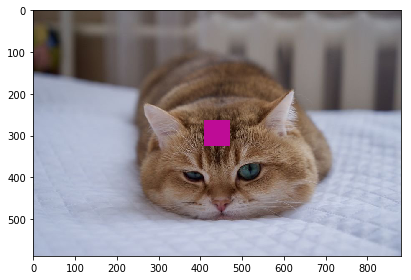

In [5]:
show_img(img)

Создаем рамку размером 10px

In [6]:
border_color = [0,0,0]
border_size = 10

img[0:sizes[0], 0:border_size] = border_color #left
img[sizes[0]-border_size:sizes[0], 0:sizes[1]] = border_color #bottom
img[0:border_size, 0:sizes[1]] = border_color #top
img[0:sizes[0], sizes[1]-border_size:sizes[1]] = border_color #right

AxesImage(31.9852,27.8;389.215x245.585)


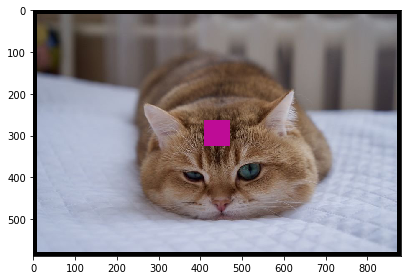

In [7]:
show_img (img)

In [8]:
calculated_border_size = 0
for i in range(0, sizes[0]):
    if all(img[i, sizes[0]//2] != border_color):
        calculated_border_size = i
        break

In [9]:
print('Ширина рамки: ', calculated_border_size)

Ширина рамки:  10


Меняем цветовые каналы 

AxesImage(31.9852,27.8;389.215x245.585)


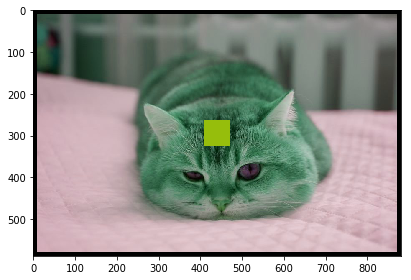

In [10]:
from numpy import dstack

rgb = [img[:,:,0], img[:,:,1], img[:,:,2]]

filtered_image = dstack((rgb[2], rgb[0], rgb[1]))
show_img (filtered_image)

Негатив изображения

AxesImage(31.9852,27.8;389.215x245.585)


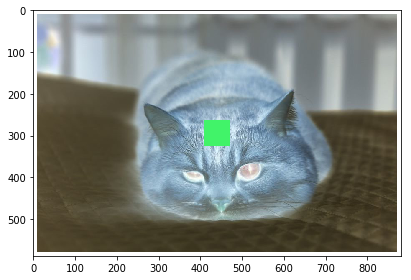

In [11]:
nrgb = [255 - rgb[0], 255 - rgb[1], 255 - rgb[2]]

filtered_image = dstack((nrgb[0], nrgb[1], nrgb[2]))
show_img (filtered_image)

## Окрашивание чб снимка по каналам

In [12]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float

In [13]:
from numpy import dstack

def mix_rgb(red, green, blue):
    return dstack((red, green, blue))

In [14]:
from numpy import roll

def shift_img(img1, img2):
    """
    img1 - изображение, которое будет сдвигаться
    img2 - изображение, относительно которого будет сдвиг
    """
    
    corr = 0
    shift = {
        "x": 0,
        "y": 0
    }
    
    shift_limits = 15

    for y in range(-shift_limits, shift_limits):
        shift_y_img = roll(img1, y, 0)
        
        for x in range(-shift_limits, shift_limits):
            shift_x_img = roll(shift_y_img, x, 1)
            shift_corr = (shift_x_img * img2).sum()
            if shift_corr > corr:
                corr = shift_corr
                shift['y'], shift['x'] = y, x
                
    return roll(roll(img1, shift['y'], 0), shift['x'], 1)

In [15]:
def cut_rgb(img, border_k = 5):
    """
    border_k - процент обрезки изображения по краям
    """
    
    img_f = img_as_float(img)
    
    border = border_k / 100
    
    channel = {
        "height": int(img_f.shape[0]//3),
        "width": img_f.shape[1]
    }
    
    cut = int(border * channel["width"])

    b = img_f[cut:channel["height"]-cut, cut:channel["width"] - cut]
    g = img_f[channel["height"] + cut:2*channel["height"] - cut,cut:channel["width"] - cut]
    r = img_f[2 * channel["height"]+cut:3*channel["height"] - cut,cut:channel["width"] - cut]
    
    return r, g, b

Считывание изображения

In [16]:
orginal_image_path = 'proscudin.jpg'

img = imread(orginal_image_path)

Разбитие изображения на каналы

In [17]:
img_r, img_g, img_b = cut_rgb(img)

Смешивание каналов без смещения

C:\Users\Marinka\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


AxesImage(10.8,27.8;410.4x245.9)


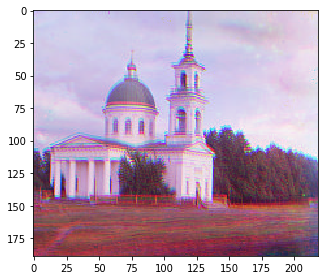

In [18]:
show_img(mix_rgb(img_r, img_g, img_b))

Рассчет смщеение для каналов друг относительно друга

Примем канал <span style="color:red">RED</span> за основной

In [19]:
shift_b = shift_img(img_b, img_r)
shift_g = shift_img(img_g, img_r)

C:\Users\Marinka\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


AxesImage(10.8,27.8;410.4x245.9)


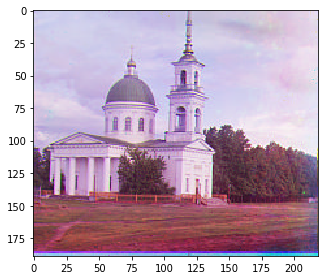

In [20]:
show_img(mix_rgb(img_r, shift_g, shift_b))

Весь алгоритм в одной функции

In [21]:
def colour_proscuding_image(imgpath):
    img = imread(orginal_image_path)
    img_r, img_g, img_b = cut_rgb(img)
    
    shift_b = shift_img(img_b, img_r)
    shift_g = shift_img(img_g, img_r)
    
    colored_image = mix_rgb(img_r, shift_g, shift_b)
    show_img(colored_image)

AxesImage(10.8,27.8;410.4x245.9)


C:\Users\Marinka\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


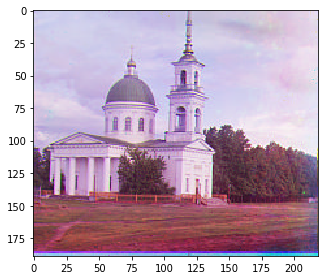

In [22]:
colour_proscuding_image(orginal_image_path)